In [1]:
# run this cell before all the others
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**1) Data Description**

In the players.csv data set, there are:
- 196 rows (observations)
- 7 columns (variables)
    - <u>experience</u>
    - this represents the level of MineCraft experience that a player has
    - a character variable with 5 categories: Veteran, Pro, Amateur, Regular and Beginner
    - <u>subscribe</u>
    - this indicates whether a player has subscribed to the game-related newsletter or not
    - a logical variable with two categories: TRUE and FALSE (later renamed in data set to Yes and No)
    - <u>hashedEmail</u>
    - this represents a player's hashed email address
    - a character variable
    -  <u>played_hours</u>
    - this represents the number of hours played by each individual
    - a double variable (for continuous numerical values) 
    - <u>name</u>
    - this reports the player's first name
    - a character variable
    - <u>gender</u>
    - this reports a player's gender
    - a character variable
    - <u>Age</u>
    - this reports a player's age
    - an integer variable (for discrete numerical values)

Within this dataset, the summary statistics for means of each quantitative variable were collected.
- the mean of player's age was ~21.14 years old
- the mean for hours played was ~5.85 hours

**2) Question**

My broad question of interest is "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"

My specific question is "can age and hours played predict whether a player subscribes to the newsletter in the players.csv data set?"

The data will help me address my question because it includes information on the players who have subscribed, how old they are, and how long they played for.

**3) Exploratory Data Analysis and Visualization**

In [2]:
players<-read.csv("https://raw.githubusercontent.com/laurentang3/dsci-100-project-009-45/refs/heads/main/players.csv")
players
colnames(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


[1] "experience"   "subscribe"    "hashedEmail"  "played_hours" "name"        
[6] "gender"       "Age"

a) compute the mean value for each quantitative variable in the players data set

In [3]:
player_means <- players |>
    summarize(played_hours = mean(played_hours, na.rm=TRUE),
             Age = mean(Age, na.rm=TRUE))
player_means

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


b) total number of players for subscription statuses

In [4]:
# renaming the variables within the subscribe column
subscribe_mutated <- mutate(players, subscribe = as_factor(subscribe)) |>
    mutate(subscribe = fct_recode(subscribe, "Yes" = "TRUE", "No" = "FALSE"))
subscribe_mutated

# Totalling the number of players based on subscription
subscriber_counts <- subscribe_mutated |>
    group_by(subscribe) |>
    summarize(count=n())
subscriber_counts

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,Yes,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,Yes,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,No,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,Yes,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,Yes,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,Yes,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,Yes,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,No,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,Yes,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


subscribe,count
<fct>,<int>
No,52
Yes,144


c) histogram of the ages that individuals are subscribed

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


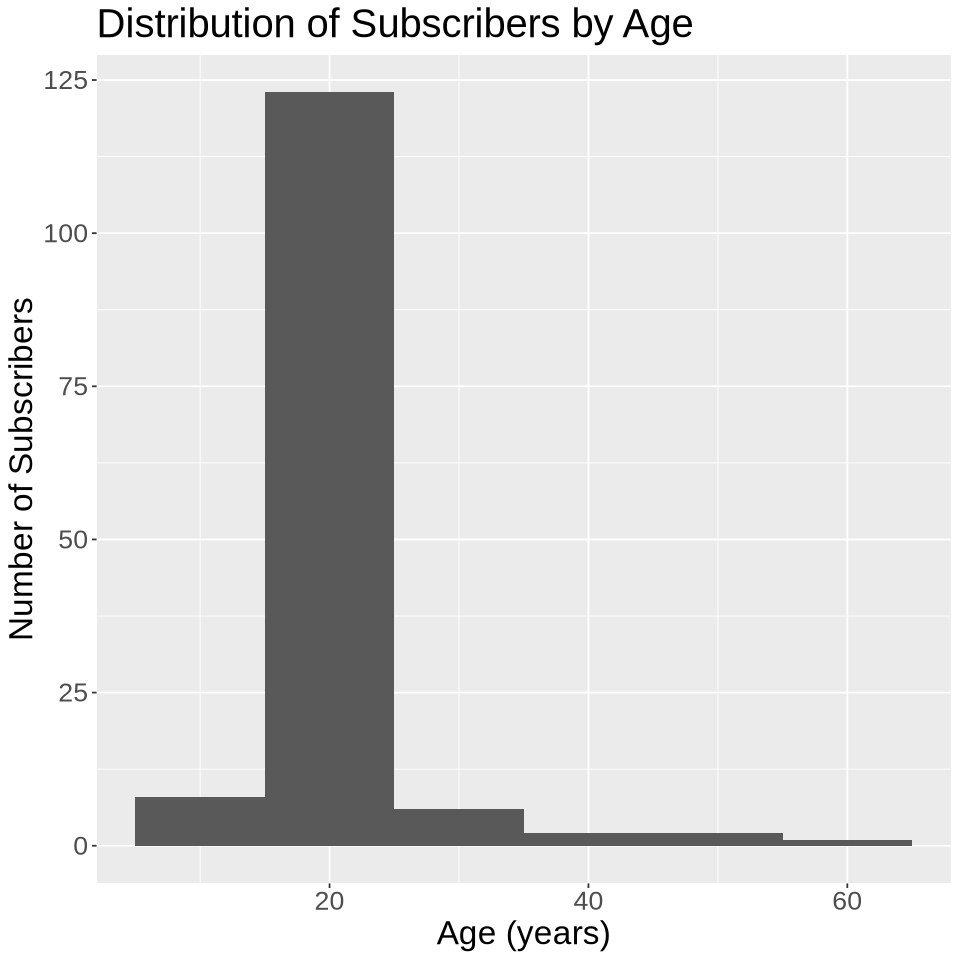

In [5]:
options(repr.plot.width=8, repr.plot.height=8)
age_subscribers <- subscribe_mutated |>
    filter(subscribe == "Yes") |>
    ggplot(aes(x=Age)) +
    geom_histogram(binwidth = 10) +
    labs(x="Age (years)", y="Number of Subscribers", title="Distribution of Subscribers by Age") +
    theme(text=element_text(size=20))
age_subscribers

d) minimum, maximum and mean number of player's age and number of hours played

In [6]:
# Age
age_summary <- players |>
    summarize(age_min = min(Age, na.rm=TRUE),
             age_max = max(Age, na.rm=TRUE),
             age_mean = mean(Age, na.rm=TRUE))
age_summary

# Hours played
played_hours_summary <- players |>
    summarize(played_hours_min = min(played_hours, na.rm=TRUE),
             played_hours_max = max(played_hours, na.rm=TRUE),
             played_hours_mean = mean(played_hours, na.rm=TRUE))
played_hours_summary

age_min,age_max,age_mean
<int>,<int>,<dbl>
9,58,21.13918


played_hours_min,played_hours_max,played_hours_mean
<dbl>,<dbl>,<dbl>
0,223.1,5.845918


e) histogram for distributions of ages and hours played among players

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


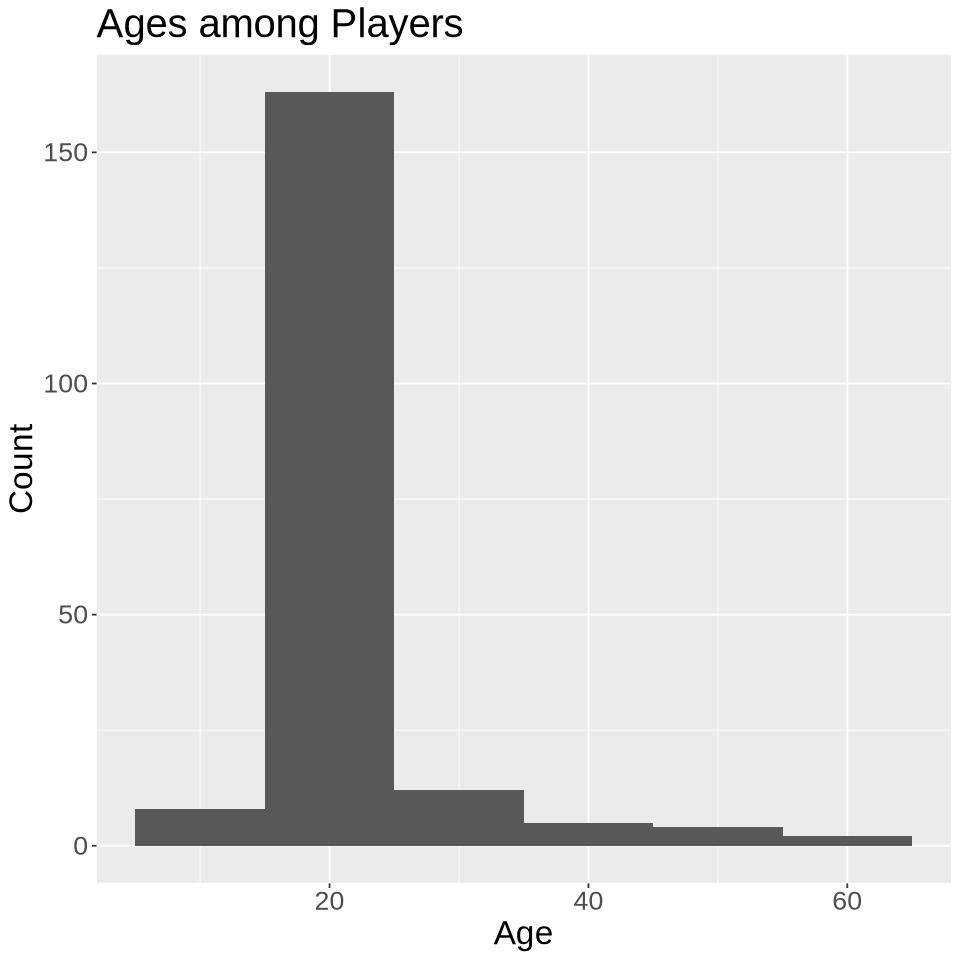

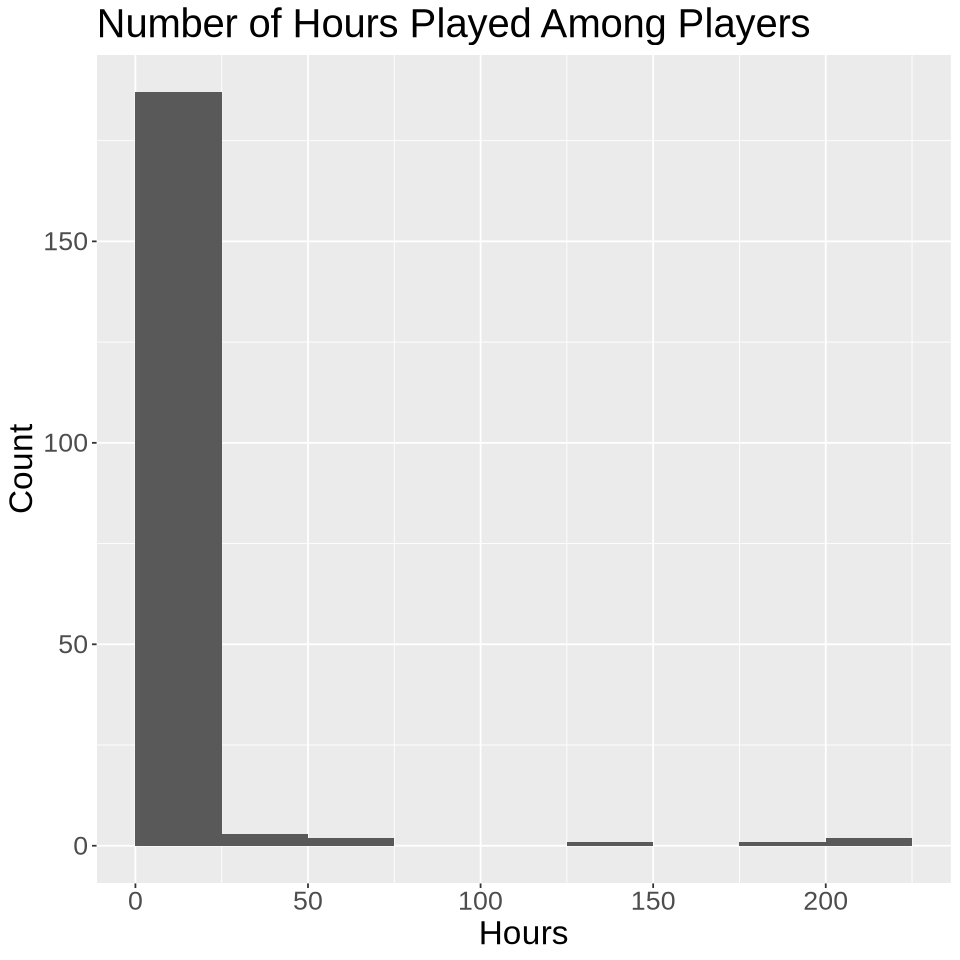

In [7]:
options(repr.plot.width = 8, repr.plot.height = 8)

# Age
age_counts <- ggplot(players, aes(x=Age)) +
    geom_histogram(binwidth=10) +
    labs(x="Age", y="Count", title="Ages among Players") +
    theme(text=element_text(size=20))
age_counts

# Hours played
played_hours_counts <- ggplot(players, aes(x=played_hours)) +
    geom_histogram(boundary = 0, binwidth=25) +
    labs(x="Hours", y="Count", title="Number of Hours Played Among Players") +
    theme(text=element_text(size=20))
played_hours_counts

**4) Methods and Plan**

One method to address my question would be to use a K-mearest Neighbors (KNN) model.

- This method will be used because the response variable is either yes or no which is a type of classification.
- Using this model assumes the points in close proximity of the observed point have similar labels. 
- the choice of k is important. Too small of a k makes the model noisy while too large of a k makes it too general.
- I will use accuracy, precision, and recall to evaluate the model's performance in correct and incorrect classifications
- I will split the data into 75% training and 25% testing 
- I will scale all the data to prevent bias as the intervals for age and hours played will be different
- 5-fold cross validation will be used on the training data to find the best k before introducing the testing set

**5) GitHub Repository**

https://github.com/laurentang3/dsci-100-project-009-45.git